In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
import pandas as pd

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

imported h5py...
modules seem to have loaded?


In [2]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18,
                     "xtick.minor.visible": True,
                     "ytick.minor.visible": True})

In [3]:
# defining color palette for plotting
palette = {"low":"olive", "high":"salmon", 
           "difference":"#2C1D11", "difference2":"#464646"
          }    
        

In [4]:
f = h5py.File(f"{paths.path_data}hail-mary/snapshot_data.hdf5",'r')
snap_dict = {}
for key, val in f.items():
    snap_dict[key] = np.array(val)
f.close()

In [5]:
dat_massive = pd.read_csv('../../data/big-bad/highmass_merger_fraction.csv',names=np.array(["Snapshot","Fraction"]))
dat_low = pd.read_csv('../../data/hail-mary/merger_fraction.csv',names=np.array(["Snapshot","Fraction"]))


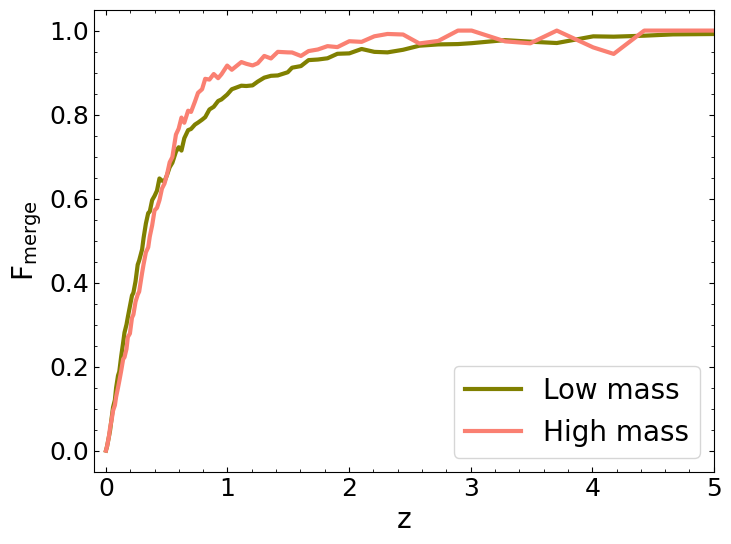

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(snap_dict['Redshift'][snap_dict['Snapshot']!=48],dat_low['Fraction'],label="Low mass",color=palette['low'],lw=3)
ax.plot(snap_dict['Redshift'][snap_dict['Snapshot']!=48],dat_massive['Fraction'],label="High mass",color=palette['high'],lw=3)
ax.set_xlim(-0.1,5)
ax.set_xlabel(r"z")
ax.set_ylabel(r"$\rm F_{merge}$")
ax.legend()
plt.savefig("../../plots/bet-on-it/1_fmerge_comp.png")
plt.show()